# Task 1: Data Preprocessing and Exploratory Analysis

This notebook preprocesses agricultural data from two Excel files and generates visualizations for understanding crop cultivation patterns and economic indicators.

**Input Files:**
- `Attachment1_EN.xlsx`: Farmland information and crop details
- `Attachment2_EN.xlsx`: 2023 planting status and economic statistics

**Output:**
- `processed_data.csv`: Clean dataset with parsed economic indicators


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

## 1. Load Data

In [2]:
# Load farmland and crop information
df_farmland = pd.read_excel('Attachment1_EN.xlsx', sheet_name='Existing Village Farmland')
df_crops = pd.read_excel('Attachment1_EN.xlsx', sheet_name='Village Crops')

# Load 2023 planting and economic data
df_planting = pd.read_excel('Attachment2_EN.xlsx', sheet_name='2023 Crop Planting Status')
df_stats = pd.read_excel('Attachment2_EN.xlsx', sheet_name='2023 Statistical Data')

print(f"Loaded {len(df_stats)} crop records")

Loaded 110 crop records


## 2. Farmland Distribution

Analyze the distribution of different plot types across the village farmland.

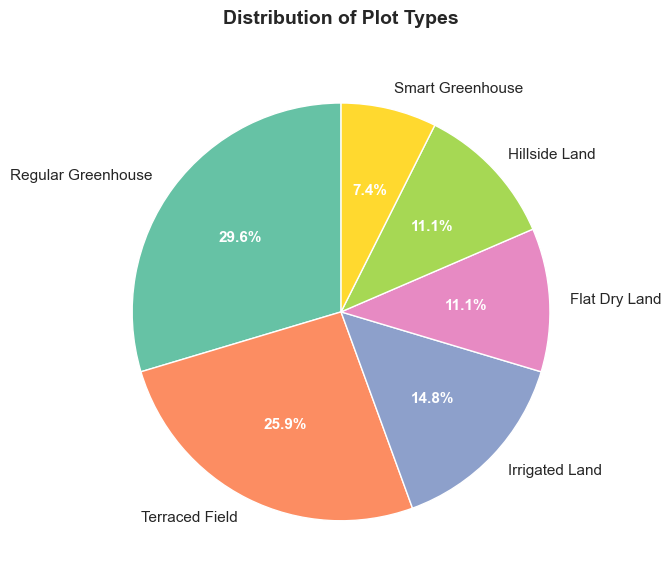

In [ ]:
plot_counts = df_farmland['Plot Type'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette('Set2', len(plot_counts))
wedges, texts, autotexts = ax.pie(plot_counts, labels=plot_counts.index, autopct='%1.1f%%',colors=colors, startangle=90, textprops={'fontsize': 11})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax.set_title('Distribution of Plot Types', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 3. Crop Type Distribution (2023)

Examine the variety of crops planted in 2023 based on planting records.

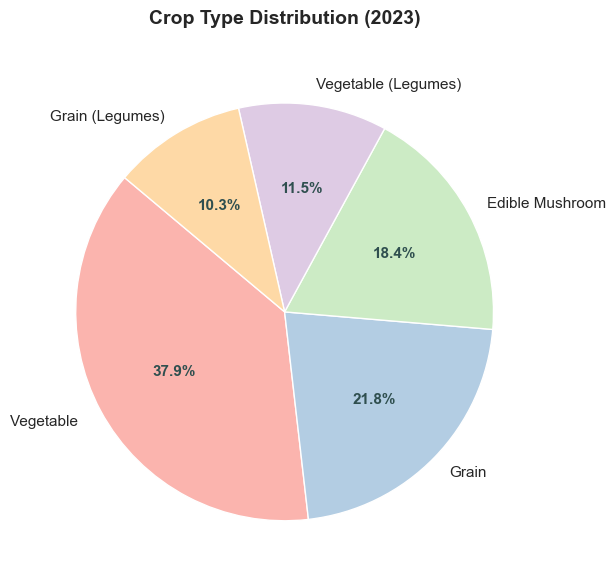

In [ ]:
crop_counts = df_planting['Crop Type'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette('Pastel1', len(crop_counts))
wedges, texts, autotexts = ax.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%',colors=colors, startangle=140, textprops={'fontsize': 11})
for autotext in autotexts:
    autotext.set_color('darkslategray')
    autotext.set_fontweight('bold')

ax.set_title('Crop Type Distribution (2023)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 4. Planting Season Analysis

Analyze how crops are distributed across different planting seasons.

In [12]:
# count and print number of plots per planting season
season_counts = df_planting['Planting Season'].value_counts()
print(season_counts.to_string())  

Planting Season
Second Season    30
First Season     29
Single Season    28


## 5. Economic Data Processing

Parse price ranges and standardize column names for downstream analysis.

**Price Format:** `"2.50-4.00"` → `Min_Price: 2.50, Max_Price: 4.00, Avg_Price: 3.25`

In [ ]:
def parse_price_range(price_str):
    if pd.isna(price_str):
        return np.nan, np.nan, np.nan
    parts = str(price_str).split('-')
    if len(parts) == 2:
        min_price = float(parts[0])
        max_price = float(parts[1])
        return min_price, max_price, (min_price + max_price) / 2
    return np.nan, np.nan, np.nan

# Parse price ranges
df_stats[['Min_Price', 'Max_Price', 'Avg_Price']] = df_stats['Selling Price (Yuan/Jin)'].apply(
    lambda x: pd.Series(parse_price_range(x))
)

# Standardize column names
df_stats.rename(columns={
    'Yield per Mu (Jin)': 'Yield_per_mu',
    'Planting Cost (Yuan/Mu)': 'Cost_per_mu'
}, inplace=True)

# Remove rows with missing prices (typically notes or totals)
df_stats = df_stats[df_stats['Min_Price'].notna()].reset_index(drop=True)

print(f"Processed {len(df_stats)} valid records")

Processed 107 valid records


## 6. Economic Indicators Overview

Visualize the distribution of key economic metrics: yield, cost, and price.

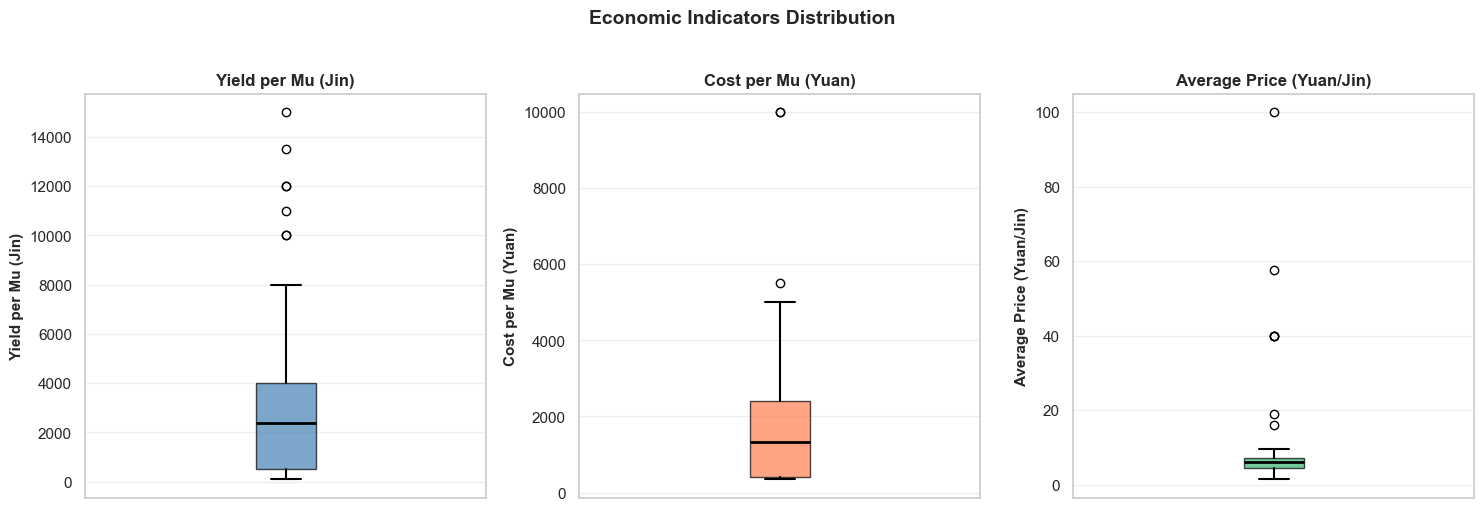

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = [
    ('Yield_per_mu', 'Yield per Mu (Jin)', 'steelblue'),
    ('Cost_per_mu', 'Cost per Mu (Yuan)', 'coral'),
    ('Avg_Price', 'Average Price (Yuan/Jin)', 'mediumseagreen')
]

for ax, (col, label, color) in zip(axes, metrics):
    ax.boxplot(df_stats[col].dropna(), patch_artist=True,
               boxprops=dict(facecolor=color, alpha=0.7),
               medianprops=dict(color='black', linewidth=2),
               whiskerprops=dict(linewidth=1.5),
               capprops=dict(linewidth=1.5))
    ax.set_ylabel(label, fontsize=11, fontweight='bold')
    ax.set_title(label, fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    ax.set_xticks([])

plt.suptitle('Economic Indicators Distribution', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('Figure4_Economic_Indicators.png', bbox_inches='tight')
plt.show()

## 7. Data Summary

Quick overview of the processed dataset.

In [8]:
summary = df_stats[['Yield_per_mu', 'Cost_per_mu', 'Avg_Price']].describe()
print("\nEconomic Indicators Summary:\n")
print(summary.round(2))

# Identify notable crops
print("\nTop 3 High-Yield Crops:")
print(df_stats.nlargest(3, 'Yield_per_mu')[['Crop Name', 'Plot Type', 'Yield_per_mu']].to_string(index=False))

print("\nTop 3 High-Cost Crops:")
print(df_stats.nlargest(3, 'Cost_per_mu')[['Crop Name', 'Plot Type', 'Cost_per_mu']].to_string(index=False))


Economic Indicators Summary:

       Yield_per_mu  Cost_per_mu  Avg_Price
count        107.00       107.00     107.00
mean        2990.84      1686.07       8.20
std         3047.93      1636.14      11.91
min          100.00       350.00       1.50
25%          500.00       400.00       4.50
50%         2400.00      1320.00       6.00
75%         4000.00      2400.00       7.12
max        15000.00     10000.00     100.00

Top 3 High-Yield Crops:
Crop Name           Plot Type  Yield_per_mu
 Cucumber Regular Greenhouse        15000.0
 Cucumber    Smart Greenhouse       13500.0
 Cucumber      Irrigated Land       12000.0

Top 3 High-Cost Crops:
         Crop Name           Plot Type  Cost_per_mu
White Elf Mushroom Regular Greenhouse       10000.0
    Morel Mushroom Regular Greenhouse       10000.0
     Water Spinach    Smart Greenhouse       5500.0


## 8. Export Processed Data

Save the clean dataset for use in subsequent clustering and optimization tasks.

In [ ]:
df_stats.to_csv('processed_data.csv', index=False, encoding='utf-8')
print(f"\nProcessed data saved: {len(df_stats)} rows, {len(df_stats.columns)} columns")


Processed data saved: 107 rows, 11 columns
